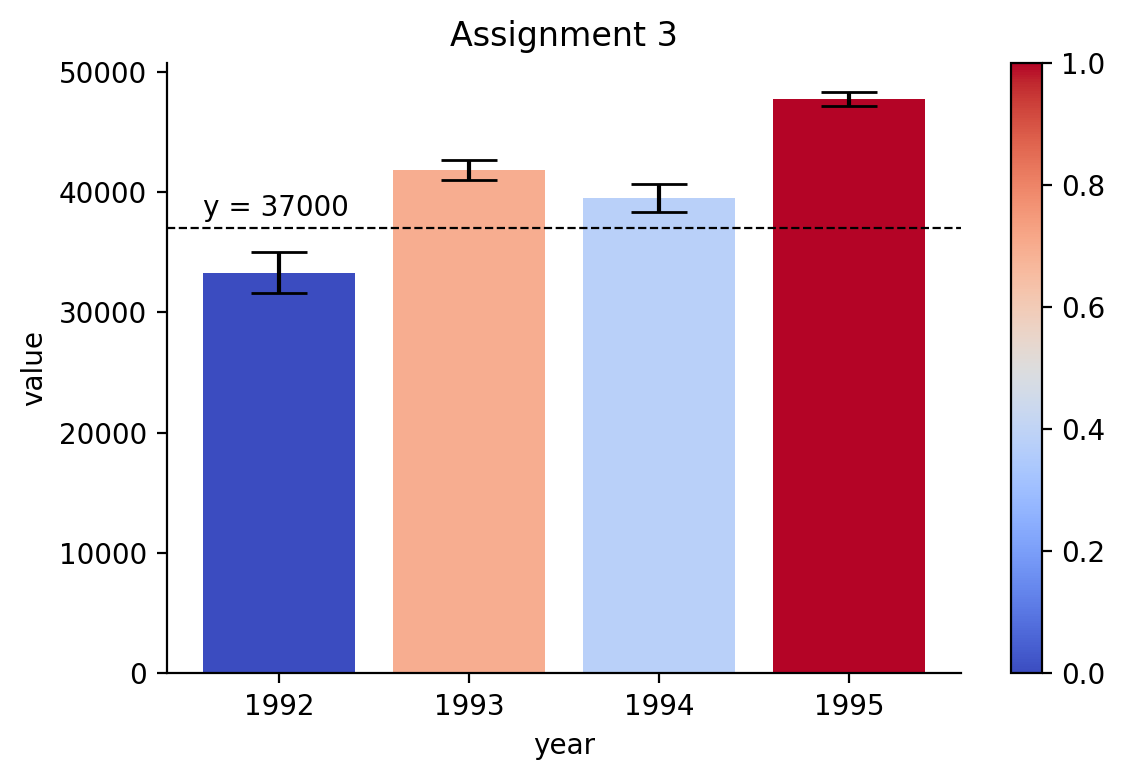

In [56]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


def prob(y, conf_arr):
    if y < np.min(conf_arr): output = 1.0
    elif y > np.max(conf_arr): output = 0.0
    else: output = (np.max(conf_arr) - y) / (np.max(conf_arr) - np.min(conf_arr))
    return output


np.random.seed(12345)
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])


mean_arr = np.array(df.mean(axis = 1))
std_arr = np.array(df.std(axis = 1))
sem_arr = np.array(df.sem(axis = 1))

n_val = df.shape[1]
mean_val = np.mean(mean_arr)

error = std_arr / (np.sqrt(n_val) * st.norm.ppf(1 - 0.05 / 2))
conf_arr = np.array([st.norm.interval(alpha = 0.95, loc = mean_val, scale = sem_val)
                    for mean_val, sem_val in zip(mean_arr, sem_arr)])
prob_arr = [prob(np.mean(mean_arr), conf) for conf in conf_arr]


y = 37000

cmap = cm.get_cmap('coolwarm')
cm_colors = cm.ScalarMappable(cmap = cmap, norm = colors.Normalize(vmin = 0, vmax = 1.0))
cm_colors.set_array([])

plt.figure(dpi = 200);
plt.title('Assignment 3');
plt.xlabel('year');
plt.ylabel('value');
plt.bar(range(df.shape[0]), mean_arr,
        yerr = error,
        color = cm_colors.to_rgba(prob_arr),
        capsize = 10);

plt.colorbar(cm_colors, orientation = 'vertical');
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']];
plt.xticks(range(df.shape[0]), df.index);
plt.axhline(y = y, color = 'black', linewidth = 0.8, linestyle = '--')
plt.text(-0.4, y + 1000, 'y = %d' %y);
plt.tight_layout()
plt.savefig('solution3.jpg')